In [1]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

import pandas as pd
import os
import numpy as np
import glob
import scipy

from mpl_toolkits.mplot3d import Axes3D
# import ROOT


In [2]:

uni = "dir_padding_1_64_8_64_200_3l_electron"

path = "/users/hep/yewzzang/work/KNO_reconstruction/combined/result_dir/*"+uni +"*/*"+uni +".csv"
# path = "/home/chyoo/work/KNO_VRDL/result/old/20230920_SAVER_sortpmt_mse_light/20230920_SAVER_sortpmt_mse_light.csv"


pred_path = glob.glob(path)
pred_list = [file for file in pred_path if file.endswith(".csv")]

In [3]:
df = pd.read_csv(pred_list[0])

In [4]:
pred = np.array(df['prediction']).reshape(-1,3)
label = np.array(df['label']).reshape(-1,3)



In [5]:
# 각 벡터 쌍에 대해 내적 계산
dot_products = np.einsum('ij,ij->i', label, pred)

# 벡터의 크기 계산
norm_a = np.linalg.norm(label, axis=1)
norm_b = np.linalg.norm(pred, axis=1)

# 코사인 값을 통해 각도 계산 (라디안 단위)
cos_theta = dot_products / (norm_a * norm_b)
theta = np.arccos(cos_theta)

# 각도를 도 단위로 변환
theta_degrees = np.degrees(theta)

print(f"각 벡터 쌍 사이의 각도 (라디안): {theta}")
print(f"각 벡터 쌍 사이의 각도 (도): {theta_degrees}")


각 벡터 쌍 사이의 각도 (라디안): [0.02694891 0.03228912 0.05126933 ... 0.11537733 0.02648332 0.02752512]
각 벡터 쌍 사이의 각도 (도): [1.54405869 1.85003022 2.93751635 ... 6.61063434 1.51738231 1.57707304]


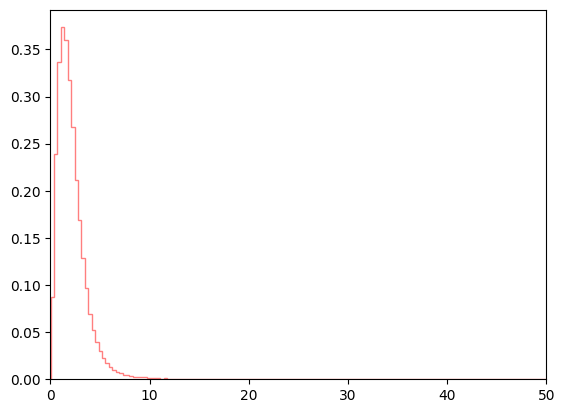

In [6]:
plt.hist(theta_degrees, bins=500, color= 'r', alpha = 0.5, density = True, histtype = 'step',label = 'degree')
plt.xlim([0,50])
plt.show()

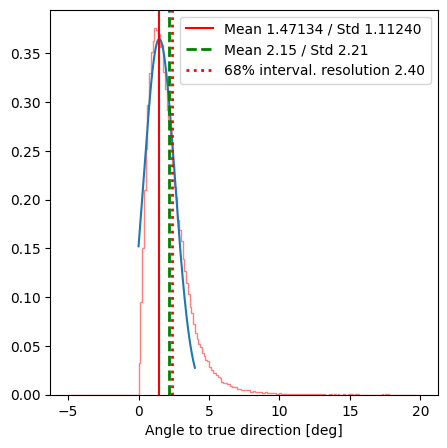

In [7]:


pp = [50,10,20]

bins = 200
def gaussian(x, A, mu, sigma):
    f = A*np.exp(-(x-mu)**2/2./sigma**2)
    return f

x_min = 0
x_max = 4



a, b, c = plt.hist(theta_degrees,bins = bins, color= 'r', alpha = 0.5, density = True, histtype = 'step')
plt.close()

plt.rcParams['figure.figsize'] = (5, 5)

# plt.subplot(3,1,vertex+1)
tmp_hist = plt.hist(theta_degrees,bins = bins, range = [-5,20], color= 'r', alpha = 0.5, density = True, histtype = 'step')
hist_N = tmp_hist[0]
hist_x = []
for i in range(len(tmp_hist[1])-1):
    tmp = tmp_hist[1]
    hist_x.append((tmp[i] + tmp[i+1])/2.)
hist_x = np.array(hist_x)

popt, pcov = curve_fit(gaussian, hist_x[(hist_x>x_min) & (hist_x<x_max)], hist_N[(hist_x>x_min) & (hist_x<x_max)], p0=pp, sigma=1./np.sqrt(hist_N[(hist_x>x_min) & (hist_x<x_max)]), absolute_sigma=True,maxfev = 8000)
hist_xx = np.arange(x_min,x_max,0.6/bins)
A = popt[0]; mu = popt[1]; sigma = popt[2]

# plt.title('DL  ' + r'$\Delta$'+'',fontsize = 15)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
# plt.xlabel("??", fontsize=10, loc='right')


plt.plot(hist_xx, gaussian(hist_xx,*popt))
plt.axvline(x=float(f"{popt[1]:.5f}"),color='r',label=f"Mean {popt[1]:.5f}"+' / ' +f"Std {np.abs(popt[2]):.5f}")
mu = popt[1]
sigma = np.abs(popt[2])
# plt.axvline(mu - sigma, color='r', linestyle='dotted', linewidth=2, label=f'left {mu - sigma:.2f}')
# plt.axvline(mu + sigma, color='r', linestyle='dotted', linewidth=2, label=f'right {mu + sigma:.2f}')



plt.axvline(np.mean(theta_degrees), color='green', linestyle='dashed', linewidth=2, label=f'Mean {np.mean(theta_degrees):.2f}'+' / '+f'Std {np.std(theta_degrees):.2f}')
mean_all_hist = np.mean(theta_degrees)
std_all_hist = np.std(theta_degrees)
# plt.axvline(mean_all_hist - std_all_hist, color='green', linestyle='dotted', linewidth=2, label=f'left {mean_all_hist - std_all_hist:.2f}')
# plt.axvline(mean_all_hist + std_all_hist, color='green', linestyle='dotted', linewidth=2, label=f'right {mean_all_hist + std_all_hist:.2f}')

plt.axvline(np.sort(theta_degrees)[int(theta_degrees.shape[0]*(0.68))], color='red', linestyle='dotted', linewidth=2, label=f'68% interval. resolution {np.sort(theta_degrees)[int(theta_degrees.shape[0]*(0.68))]:.2f}')
plt.legend()
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel('Angle to true direction [deg]')
# plt.grid()
plt.show()


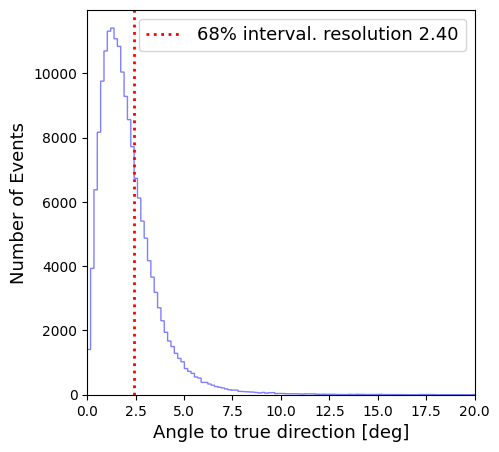

In [8]:

bins = 1000

plt.hist(theta_degrees,bins = bins, color= 'b', alpha = 0.5, density = False, histtype = 'step')


plt.axvline(np.sort(theta_degrees)[int(theta_degrees.shape[0]*(0.68))], color='red', linestyle='dotted', linewidth=2, label=f'68% interval. resolution {np.sort(theta_degrees)[int(theta_degrees.shape[0]*(0.68))]:.2f}')


# plt.title('Histogram of distance from true vertex',fontsize = 15)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
# plt.xlabel("??", fontsize=10, loc='right')
plt.xlim([0,20])
plt.xlabel('Angle to true direction [deg]',fontsize=13)
plt.ylabel('Number of Events',fontsize=13)
plt.legend(fontsize=13)
plt.show()


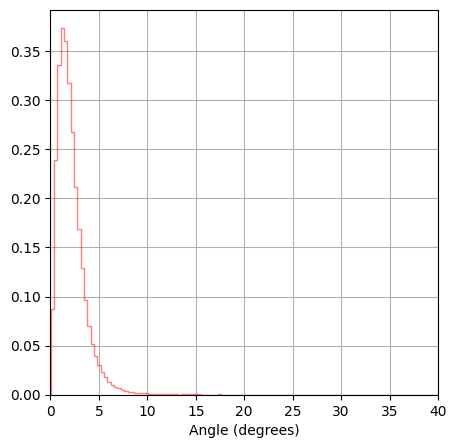

(2.1517923837521113, 1.0415105128981639)

In [9]:
plt.hist(theta_degrees, bins=500, color= 'r', alpha = 0.5, density = True, histtype = 'step',label = 'degree')

plt.xlabel('Angle (degrees)')

plt.grid(True)
plt.xlim([0,40])
plt.show()

# 전체 평균값 계산
mean_angle = np.mean(theta_degrees)

# 히스토그램의 피크 값 계산
counts, bin_edges = np.histogram(theta_degrees, bins=500)
peak_angle = bin_edges[np.argmax(counts)]

mean_angle, peak_angle